# Project Overview: Machine Learning for Predicting Unit Price of Imported Goods
## Author: Paul Sentongo

## Introduction
The objective of this project is to detect undervaluation and overvaluation of imported goods by predicting the unit price of a given commodity in local currency. This is critical for ensuring fair trade practices and accurate taxation. This project involves several stages including data preparation, exploratory data analysis, feature engineering, model building, evaluation, and deployment.

## Key Steps
1. **Data Collection and Preparation**
   - Load the dataset and understand its structure.
   - Clean and preprocess the data.
   - Handle missing values and detect outliers.
   
2. **Exploratory Data Analysis (EDA)**
   - Conduct descriptive statistics to understand data distribution.
   - Visualize data to identify patterns and relationships.

3. **Feature Engineering**
   - Create new features that may enhance model performance.
   - Normalize or scale features if necessary.

4. **Model Building**
   - Select appropriate machine learning algorithms.
   - Train and validate models using cross-validation.
   
5. **Model Evaluation**
   - Evaluate models using relevant metrics.
   - Select the best-performing model based on evaluation results.

6. **Model Deployment**
   - Preparing the final model for deployment.
   - Deploying the model using a suitable platform (e.g., Streamlit, Flask for web deployment).

7. **Monitoring and Maintenance**
   - Monitor model performance in production.
   - Update the model as necessary based on new data and feedback.

## Tools and Technologies
- **Programming Language:** Python
- **Libraries:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, Flask
- **Deployment Platform:** Streamlit, Flask, Docker

This approach ensures a robust solution for detecting pricing discrepancies in imported goods, thereby aiding in regulatory compliance and economic fairness.

## Import necessary libraries

In [11]:
# importing libraries to be used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Variables description

In [12]:
from tabulate import tabulate

# Defining attributes and their descriptions
attributes = [
    ["Date", "Date of import record"],
    ["HS_Code", "Harmonized system commodity code (HS code)"],
    ["Item_Description", "Description of the imported item"],
    ["Country_of_Origin", "Country from which the goods originated"],
    ["Port_of_Shipment", "Port through which the goods entered Uganda"],
    ["Quantity", "Quantity of goods imported"],
    ["Quantity_Unit", "Unit of measurement for the quantity (e.g., units, boxes, liters)"],
    ["Net_Mass_kg", "Net mass (excluding packaging)"],
    ["Gross_Mass_kg", "Gross mass (including packaging)"],
    ["FOB_Value_USD", "Free on Board value in USD (excluding freight and insurance)"],
    ["Freight_USD", "Freight cost in USD"],
    ["Insurance_USD", "Insurance cost in USD"],
    ["CIF_Value_USD", "CIF (Cost, Insurance, and Freight) value in USD"],
    ["CIF_Value_UGX", "CIF value in local currency (UGX)"],
    ["Unit_Price_Actual_UGX", "Actual unit price in local currency (UGX)"],
    ["Unit_Price_Predicted_UGX", "Predicted unit price in local currency (UGX)"],
    ["Tax_Rate", "Import duty rate as a percentage"],
    ["Currency_Code", "Currency code for original values (e.g., USD)"],
    ["Mode_of_Transport", "Mode of transport used (Land, Air, or Water)"],
    ["Unit_Price_Calculated_UGX", "Unit price in local currency including all duties and taxes"]
]

# Creating markdown table
markdown_table = tabulate(attributes, headers=["Attribute", "Description"], tablefmt="github")

print(markdown_table)


| Attribute                 | Description                                                       |
|---------------------------|-------------------------------------------------------------------|
| Date                      | Date of import record                                             |
| HS_Code                   | Harmonized system commodity code (HS code)                        |
| Item_Description          | Description of the imported item                                  |
| Country_of_Origin         | Country from which the goods originated                           |
| Port_of_Shipment          | Port through which the goods entered Uganda                       |
| Quantity                  | Quantity of goods imported                                        |
| Quantity_Unit             | Unit of measurement for the quantity (e.g., units, boxes, liters) |
| Net_Mass_kg               | Net mass (excluding packaging)                                    |
| Gross_Mass_kg     

In [13]:
# Loading the dataset
data = pd.read_csv('uganda_imports_trade_data.csv')

In [15]:
data.head(5)

,Date,HS_Code,Item_Description,Country_of_Origin,Port_of_Shipment,Quantity,Quantity_Unit,Net_Mass_kg,Gross_Mass_kg,FOB_Value_USD,Freight_USD,Insurance_USD,CIF_Value_USD,CIF_Value_UGX,Unit_Price_UGX,Tax_Rate,Currency_Code,Mode_of_Transport
0,02/10/2022,39011010,Polyethylene plastics,Germany,Malaba,28.00,units,18.47,19.99,4115.88,219.74,18.82,4354.44,16374241.92,584794.35,0.10,USD,Land
1,02/06/2022,85044010,Power supply equipment,Kenya,Entebbe Airport,1330.84,boxes,2934.69,3176.72,3263.67,305.87,14.72,3584.26,12963758.95,9741.03,0.18,USD,Air
2,23/05/2020,87032319,Used passenger vehicles,India,Entebbe Airport,26.40,liters,121.75,131.80,8129.32,993.55,60.83,9183.70,32501746.56,1231126.76,0.18,USD,Air
3,04/03/2023,84089010,Industrial machinery parts,Germany,Malaba,105.20,pairs,173.09,187.36,4418.50,372.36,23.54,4814.40,18717587.29,177923.83,0.18,USD,Land
4,30/03/2024,84089010,Industrial machinery parts,Kenya,Port Bell,346.09,boxes,693.45,750.64,3156.11,395.04,26.58,3577.73,12924098.13,37343.17,0.20,USD,Water


In [18]:
#checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               100000 non-null  object 
 1   HS_Code            100000 non-null  int64  
 2   Item_Description   100000 non-null  object 
 3   Country_of_Origin  100000 non-null  object 
 4   Port_of_Shipment   100000 non-null  object 
 5   Quantity           100000 non-null  float64
 6   Quantity_Unit      100000 non-null  object 
 7   Net_Mass_kg        100000 non-null  float64
 8   Gross_Mass_kg      100000 non-null  float64
 9   FOB_Value_USD      100000 non-null  float64
 10  Freight_USD        100000 non-null  float64
 11  Insurance_USD      100000 non-null  float64
 12  CIF_Value_USD      100000 non-null  float64
 13  CIF_Value_UGX      100000 non-null  float64
 14  Unit_Price_UGX     100000 non-null  float64
 15  Tax_Rate           100000 non-null  float64
 16  Cur

In [19]:
# checking for shape of the dataset
data.shape

(100000, 18)

# creating predictor variable

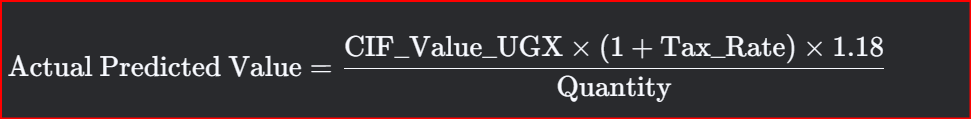